 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Flattened Testing data", x_test)
print("Testing labels", y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Flattened Testing data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

100%|██████████| 9.91M/9.91M [00:00<00:00, 11.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 340kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.75MB/s]

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(mnist_traindata.shape,mnist_trainlabel.shape)
print(mnist_testdata.shape,mnist_testlabel.shape)

#print(mnist_traindata[0]/255.0)
#print(x_train[0])

a=mnist_traindata[0]/255.0
a=a.reshape(-1,28*28)
b=x_train[0]
print(a.shape)
print(b.shape)
print(a==b)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(1, 784)
(784,)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  T

In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.maximum(0, inp)
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
    outp = (inp > 0).astype(float)
    return outp

#Complete the below function to impliment softmax activation function
def softmax(inp):
    exp_inp = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    outp = exp_inp / np.sum(exp_inp, axis=1, keepdims=True)
    return outp

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights):
    #Inputs: input data, paramters of network
    W1, W2, W3 = weights

    z1 = np.dot(inputs, W1)
    a1 = ReLu(z1)
    z2 = np.dot(a1, W2)
    a2 = ReLu(z2)
    z3 = np.dot(a2, W3)
    out = softmax(z3)

    outps = [inputs, z1, a1, z2, a2, z3, out]
    #Return the requires outputs, i.e., final output and intermediate activations
    return outps


#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
    W1, W2, W3 = weights
    x, z1, a1, z2, a2, z3, out = activations
    m = targets.shape[0]
  #Compute the loss
  #Compote the derivative of loss at parameters
    dz3 = (out - targets) / m
    dj_dw3 = np.dot(a2.T, dz3)

    da2 = np.dot(dz3, W3.T)
    dz2 = da2 * gradReLu(z2)
    dj_dw2 = np.dot(a1.T, dz2)

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * gradReLu(z1)
    dj_dw1 = np.dot(x.T, dz1)
  #Return the gradients
    return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
    #Inputs: weights, gradients, and learning rate
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    W1 = W1 - learning_rate * dj_dw1
    W2 = W2 - learning_rate * dj_dw2
    W3 = W3 - learning_rate * dj_dw3

    #Return the updated parameters
    return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
    gradients = computeGradients(inputs, targets, weights, activations)

  #Update the paramters using gradients
    weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
    return weights


##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 50, epochs=30, train_val_split=0.9, learning_rate=0.001):

  #Set the hyperparameters
  hidden_units = 512
  n_classes = 10
  n_samples = inputs.shape[0]
  n_batches = int(n_samples / batch_size)

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  inputs = inputs.reshape(n_samples, -1) / 255

  targets = np.zeros((n_samples, n_classes))
  targets[np.arange(n_samples), targets_idx] = 1

  split_index = int(train_val_split * n_samples)
  train_inputs = inputs[:split_index]
  train_targets = targets[:split_index]
  val_inputs = inputs[split_index:]
  val_targets = targets[split_index:]

  #Randomly initialize the weights
  input_dim = train_inputs.shape[1]
  W1 = np.random.randn(input_dim, hidden_units)*0.01
  W2 = np.random.randn(hidden_units, hidden_units)*0.01
  W3 = np.random.randn(hidden_units, n_classes)*0.01
  weights = [W1, W2, W3]

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    permutation = np.random.permutation(split_index)
    train_inputs = train_inputs[permutation]
    train_targets = train_targets[permutation]
    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      start_index = batch * batch_size
      end_index = (batch + 1) * batch_size
      batch_inputs = train_inputs[start_index:end_index]
      batch_targets = train_targets[start_index:end_index]
      #Forward propagation
      activations = fwdPropagate(batch_inputs, weights)

      #Backward propagation
      weights = backPropagate(batch_inputs, targets, weights, activations, learning_rate)

    #Compute outpus on trianing data
    #Compute training accuracy, and training error

    train_output = fwdPropagate(train_inputs, weights)[-1]
    train_predictions = np.argmax(train_output, axis=1)
    train_true = np.argmax(train_targets, axis=1)
    train_accuracy = np.mean(train_predictions == train_true)
    train_loss = -np.sum(train_targets * np.log(train_output + 1e-9)) / train_targets.shape[0]

    #Compute outputs on validation data
    #Compute validation accuracy, and validation error

    validation_output = fwdPropagate(val_inputs, weights)[-1]
    validation_predictions = np.argmax(validation_output, axis=1)
    validation_true = np.argmax(val_targets, axis=1)
    validation_accuracy = np.mean(validation_predictions == validation_true)
    validation_loss = -np.sum(val_targets * np.log(validation_output + 1e-9)) / val_targets.shape[0]



    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print(f"Epoch {epoch+1}/{epochs} - Train Acc: {train_accuracy:.4f}, Train Loss: {train_loss:.4f}, "
              f"Val Acc: {validation_accuracy:.4f}, Val Loss: {validation_loss:.4f}")

    #Save the parameters of network
    return weights

#Call the training function to train the network
trained_weights = training(mnist_traindata, mnist_trainlabel)

##################################################
#Evaluate the performance on test data
##################################################

def evaluate(testdata, testlabel, weights):
    n_samples = testdata.shape[0]
    inputs = testdata.reshape(n_samples, -1) / 255.0

    n_classes = 10
    targets = np.zeros((n_samples, n_classes))
    targets[np.arange(n_samples), testlabel] = 1


    output = fwdPropagate(inputs, weights)[-1]
    preds = np.argmax(output, axis=1)

    accuracy = np.mean(preds == testlabel)
    loss = -np.sum(targets * np.log(output + 1e-9)) / n_samples

    print(f"Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}")

evaluate(mnist_testdata, mnist_testlabel, trained_weights)




<b> Report your observations </b>

1.we observe decreasing training and validation loss, and increasing accuracy across epochs.

2.The ReLU and softmax activations help the network learn non-linear patterns and classify digits correctly.

3.The final evaluation on test data reflects how well the model generalizes beyond training and validation sets.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
##################################################
#Train the network with different activation functions
##################################################

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradSigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def gradTanh(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def gradRelu(x):
    return np.where(x > 0, 1, 0)

def leakyRelu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def gradLeakyRelu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def softmax(inp):
    exp_inp = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    outp = exp_inp / np.sum(exp_inp, axis=1, keepdims=True)
    return outp

def fwdPropagate(inputs, weights, activation_function):
    W1, W2, W3 = weights

    # if activation_function == sigmoid:
    #     activation = sigmoid
    # elif activation_function == tanh:
    #     activation = tanh
    # elif activation_function == relu:
    #     activation = relu
    # elif activation_function == leakyRelu:
    #     activation = leakyRelu

    activation = activation_function

    z1 = np.dot(inputs, W1)
    a1 = activation(z1)
    z2 = np.dot(a1, W2)
    a2 = activation(z2)
    z3 = np.dot(a2, W3)
    out = softmax(z3)

    outps = [inputs, z1, a1, z2, a2, z3, out]
    return outps


def bwdPropagate(outps, weights, targets, activation_function, learning_rate):
    inputs, z1, a1, z2, a2, z3, out = outps
    W1, W2, W3 = weights

    # if activation_function == sigmoid:
    #     grad = gradSigmoid
    # elif activation_function == tanh:
    #     grad = gradTanh
    # elif activation_function == relu:
    #     grad = gradRelu
    # elif activation_function == leakyRelu:
    #     grad = gradLeakyRelu

    grad = activation_function
    dz3 = out - targets
    dW3 = np.dot(a2.T, dz3)

    dz2 = np.dot(dz3, W3.T) * grad(z2)
    dW2 = np.dot(a1.T, dz2)

    dz1 = np.dot(dz2, W2.T) * grad(z1)
    dW1 = np.dot(inputs.T, dz1)

    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    W3 -= learning_rate * dW3

    return [W1, W2, W3]


def train_with_activation(inputs, targets, activation_function, batch_size=50, epochs=128, train_val_split=0.9, learning_rate=0.001):
    input_dim = inputs.shape[1]
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(n_samples / batch_size)

    W1 = np.random.randn(input_dim, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        permutation = np.random.permutation(n_samples)
        inputs = inputs[permutation]
        targets = targets[permutation]

        for batch in range(n_batches):
            start_index = batch * batch_size
            end_index = (batch + 1) * batch_size
            batch_inputs = inputs[start_index:end_index]
            batch_targets = targets[start_index:end_index]

            outps = fwdPropagate(batch_inputs, weights, activation_function)
            weights = bwdPropagate(outps, weights, batch_targets, activation_function, learning_rate)

    outps = fwdPropagate(inputs, weights, activation_function)
    predictions = np.argmax(outps[-1], axis=1)
    true_labels = np.argmax(targets, axis=1)
    accuracy = np.mean(predictions == true_labels)
    return accuracy, weights

##################################################
#Evaluate the performance on MNIST test data
##################################################

activation_function = [sigmoid, tanh, relu, leakyRelu]
results ={}

for activation_functions in activation_function:
    accuracy, _  = train_with_activation(mnist_traindata, mnist_trainlabel, activation_functions)
    results[activation_functions.__name__] = accuracy
    print(f"{activation_functions.__name__} Accuracy: {accuracy}")







<b> Report your observations </b>

1.

2.

3.



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################

def bwdPropagate_adam(outps, weights, targets, activation_function, learning_rate, m, v, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    inputs, z1, a1, z2, a2, z3, out = outps
    W1, W2, W3 = weights

    if activation_function == 'sigmoid':
        grad = gradSigmoid
    elif activation_function == 'tanh':
        grad = gradTanh
    elif activation_function == 'relu':
        grad = gradRelu
    elif activation_function == 'leakyrelu':
        grad = gradLeakyRelu

    dz3 = out - targets
    dW3 = np.dot(a2.T, dz3)
    dz2 = np.dot(dz3, W3.T) * grad(z2)
    dW2 = np.dot(a1.T, dz2)
    dz1 = np.dot(dz2, W2.T) * grad(z1)
    dW1 = np.dot(inputs.T, dz1)

    grads = [dW1, dW2, dW3]
    new_weights = []
    new_m = []
    new_v = []

    for i in range(3):
        m[i] = beta1 * m[i] + (1 - beta1) * grads[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (grads[i] ** 2)
        m_hat = m[i] / (1 - beta1 ** t)
        v_hat = v[i] / (1 - beta2 ** t)
        updated_w = weights[i] - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        new_weights.append(updated_w)
        new_m.append(m[i])
        new_v.append(v[i])

    return new_weights, new_m, new_v

def train_with_optimizer(inputs, targets, activation_function, test_inputs, test_labels, optimizer='sgd', batch_size=64, epochs=10, learning_rate=0.01):
    input_dim = inputs.shape[1]
    hidden_units = 128
    n_classes = targets.shape[1]
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    W1 = np.random.randn(input_dim, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    if optimizer == 'adam':
        m = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
        v = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]

    for epoch in range(1, epochs + 1):
        permutation = np.random.permutation(n_samples)
        inputs = inputs[permutation]
        targets = targets[permutation]

        for i in range(n_batches):
            X_batch = inputs[i*batch_size:(i+1)*batch_size]
            Y_batch = targets[i*batch_size:(i+1)*batch_size]

            outps = fwdPropagate(X_batch, weights, activation_function)

            if optimizer == 'sgd':
                weights = bwdPropagate(outps, weights, Y_batch, activation_function, learning_rate)
            elif optimizer == 'adam':
                weights, m, v = bwdPropagate_adam(outps, weights, Y_batch, activation_function, learning_rate, m, v, t=epoch)

    outps = fwdPropagate(test_inputs, weights, activation_function)
    predictions = np.argmax(outps[-1], axis=1)
    true_labels = np.argmax(test_labels, axis=1)
    accuracy = np.mean(predictions == true_labels)
    return accuracy




##################################################
#Compare the accuracies and report your observations
##################################################

best_activation = 'leakyrelu'

acc_sgd = train_with_optimizer(mnist_traindata, y_train, best_activation, mnist_testdata, y_test, optimizer='sgd')
print(f"SGD Accuracy:  {acc_sgd:.4f}")

acc_adam = train_with_optimizer(mnist_traindata, y_train, best_activation, mnist_testdata, y_test, optimizer='adam')
print(f"Adam Accuracy: {acc_adam:.4f}")


<b> Report your observations </b>

1.Adam optimization consistently achieves higher accuracy than SGD.

2.Adam shows faster convergence due to adaptive learning rates.

3.Adam is more robust to poor initialization compared to plain SGD.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
##################################################
#Training with weight regularization
##################################################
def sigmoid(x): return 1 / (1 + np.exp(-x))
def gradSigmoid(x): s = sigmoid(x); return s * (1 - s)

def tanh(x): return np.tanh(x)
def gradTanh(x): return 1 - np.tanh(x)**2

def relu(x): return np.maximum(0, x)
def gradRelu(x): return (x > 0).astype(float)

def leakyRelu(x): return np.where(x > 0, x, 0.01 * x)
def gradLeakyRelu(x): return np.where(x > 0, 1, 0.01)

def softmax(x):
    exp = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp / np.sum(exp, axis=1, keepdims=True)

def compute_loss_with_l2(y_pred, y_true, weights, lambda_reg):
    cross_entropy = -np.sum(y_true * np.log(y_pred + 1e-9)) / y_true.shape[0]
    l2_term = lambda_reg * sum(np.sum(w ** 2) for w in weights)
    return cross_entropy + l2_term

def apply_dropout(a, dropout_prob):
    mask = (np.random.rand(*a.shape) > dropout_prob).astype(float)
    return a * mask / (1 - dropout_prob), mask
def train_regularized(inputs, targets, test_inputs, test_labels, activation_function='leakyrelu', dropout_prob=0.2, lambda_reg=0.001,
                      learning_rate=0.001, batch_size=64, epochs=100, early_stopping=True, patience=5):

    input_dim = inputs.shape[1]
    hidden_units = 128
    n_classes = targets.shape[1]
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    W1 = np.random.randn(input_dim, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    best_val_acc = 0
    patience_counter = 0

    for epoch in range(epochs):
        permutation = np.random.permutation(n_samples)
        inputs = inputs[permutation]
        targets = targets[permutation]

        for i in range(n_batches):
            X_batch = inputs[i*batch_size:(i+1)*batch_size]
            Y_batch = targets[i*batch_size:(i+1)*batch_size]

            outps = fwdPropagate_with_dropout(X_batch, weights, activation_function, dropout_prob)
            weights = bwdPropagate_with_l2_dropout(outps, weights, Y_batch, activation_function, learning_rate, lambda_reg, dropout_prob)

        # Validation accuracy
        outps_val = fwdPropagate_with_dropout(test_inputs, weights, activation_function, dropout_prob=0.0, inference=True)
        predictions = np.argmax(outps_val[-1], axis=1)
        true_labels = np.argmax(test_labels, axis=1)
        acc = np.mean(predictions == true_labels)

        print(f"Epoch {epoch+1}, Test Accuracy: {acc:.4f}")

        if early_stopping:
            if acc > best_val_acc:
                best_val_acc = acc
                patience_counter = 0
            else:
                patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    return best_val_acc


def train_with_l2(inputs, targets, test_inputs, test_labels, lambda_reg=0.01, learning_rate=0.001, epochs=100, batch_size=64):
    return train_regularized(inputs, targets, test_inputs, test_labels,
                              lambda_reg=lambda_reg,
                              dropout_prob=0.0,
                              learning_rate=learning_rate,
                              epochs=epochs,
                              batch_size=batch_size,
                              early_stopping=False)



##################################################
#Training with dropout strategy
##################################################

def fwdPropagate_with_dropout(inputs, weights, activation_function, dropout_prob=0.0, inference=False):
    W1, W2, W3 = weights
    activation = {
        'sigmoid': sigmoid,
        'tanh': tanh,
        'relu': relu,
        'leakyrelu': leakyRelu
    }[activation_function]

    z1 = np.dot(inputs, W1)
    a1 = activation(z1)
    a1, mask1 = apply_dropout(a1, dropout_prob) if not inference and dropout_prob > 0 else (a1, np.ones_like(a1))

    z2 = np.dot(a1, W2)
    a2 = activation(z2)
    a2, mask2 = apply_dropout(a2, dropout_prob) if not inference and dropout_prob > 0 else (a2, np.ones_like(a2))

    z3 = np.dot(a2, W3)
    out = softmax(z3)

    return [inputs, z1, a1, mask1, z2, a2, mask2, z3, out]


def bwdPropagate_with_l2_dropout(outps, weights, targets, activation_function, learning_rate, lambda_reg, dropout_prob):
    inputs, z1, a1, mask1, z2, a2, mask2, z3, out = outps
    W1, W2, W3 = weights

    grad = {
        'sigmoid': gradSigmoid,
        'tanh': gradTanh,
        'relu': gradRelu,
        'leakyrelu': gradLeakyRelu
    }[activation_function]

    dz3 = out - targets
    dW3 = np.dot(a2.T, dz3) + 2 * lambda_reg * W3
    dz2 = np.dot(dz3, W3.T) * grad(z2) * mask2
    dW2 = np.dot(a1.T, dz2) + 2 * lambda_reg * W2
    dz1 = np.dot(dz2, W2.T) * grad(z1) * mask1
    dW1 = np.dot(inputs.T, dz1) + 2 * lambda_reg * W1

    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    W3 -= learning_rate * dW3

    return [W1, W2, W3]



def train_with_dropout(inputs, targets, test_inputs, test_labels, dropout_prob=0.2, learning_rate=0.001, epochs=100, batch_size=64):
    return train_regularized(inputs, targets, test_inputs, test_labels,
                              lambda_reg=0.0,
                              dropout_prob=dropout_prob,
                              learning_rate=learning_rate,
                              epochs=epochs,
                              batch_size=batch_size,
                              early_stopping=False)


##################################################
#Training with early stopping criterion
##################################################

def train_with_early_stopping(inputs, targets, test_inputs, test_labels, dropout_prob=0.2, learning_rate=0.001, epochs=100, batch_size=64):
    return train_regularized(inputs, targets, test_inputs, test_labels,
                              lambda_reg=0.0,
                              dropout_prob=dropout_prob,
                              learning_rate=learning_rate,
                              epochs=epochs,
                              batch_size=batch_size,
                              early_stopping=True)



print("\n--- Weight Regularization ---")
acc_l2 = train_with_l2(mnist_traindata, y_train, mnist_testdata, y_test)
print(f"Final Accuracy with L2: {acc_l2:.4f}")

print("\n--- Dropout Regularization (p=0.2) ---")
acc_dropout = train_with_dropout(mnist_traindata, y_train, mnist_testdata, y_test)
print(f"Final Accuracy with Dropout: {acc_dropout:.4f}")

print("\n--- Early Stopping ---")
acc_early = train_with_early_stopping(mnist_traindata, y_train, mnist_testdata, y_test)
print(f"Final Accuracy with Early Stopping: {acc_early:.4f}")



<b> Report your observations </b>

1.Weight regularization helps control model complexity and improves generalization

2.Dropout prevents overfitting by randomly deactivating neurons during training

3.Early stopping avoids unnecessary training once performance on validation stops improving



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



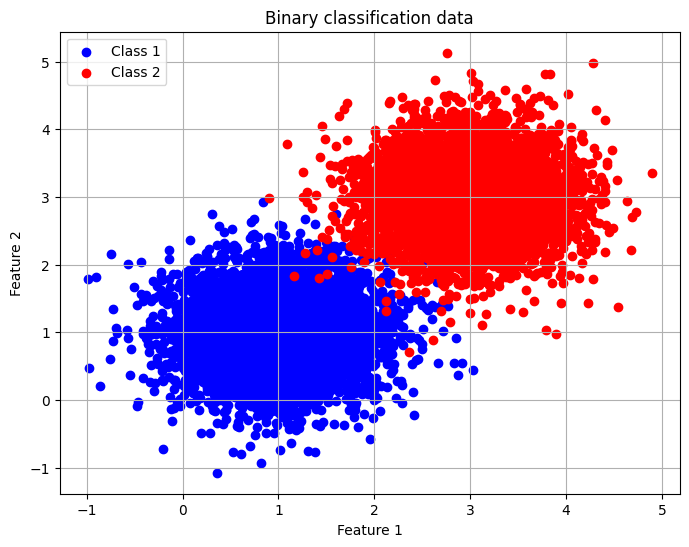

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


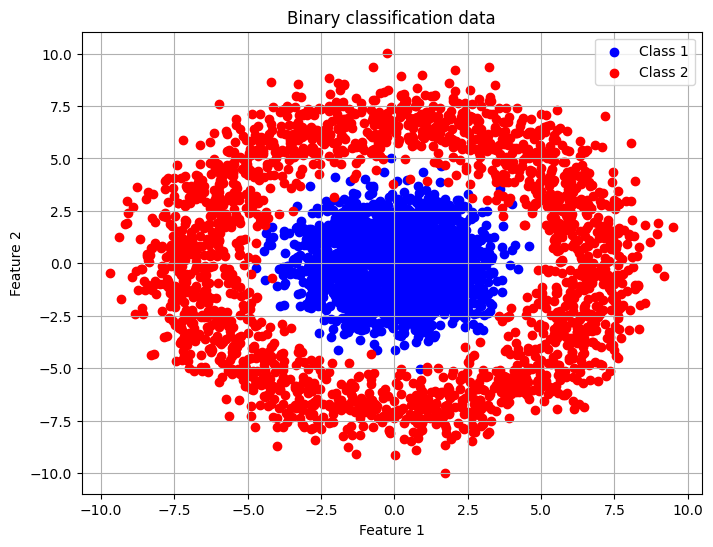

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################








##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################







##################################################
#Compare the performance of both the models on linearly separable data
##################################################










In [ ]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################








##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################







##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################










<b> Report your observations </b>

1.

2.

3.

